<a href="https://colab.research.google.com/github/Reem-Aboutaleb/eeg-alpha-wave-detector/blob/main/alpha_wave_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 993 samples (1.653 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


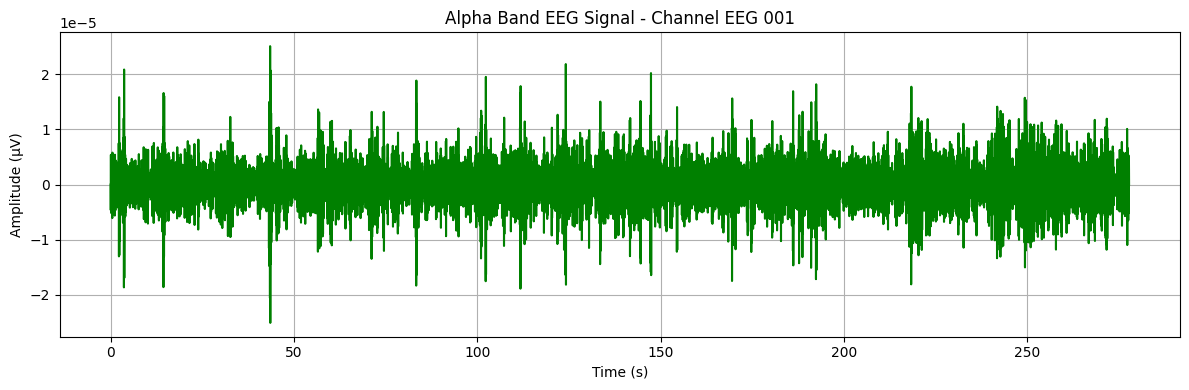

In [5]:
# Install MNE
!pip install -q mne

# Imports
import mne
import matplotlib.pyplot as plt
%matplotlib inline

# Load MNE sample EEG dataset
sample_data_folder = mne.datasets.sample.data_path()
raw_file = sample_data_folder / 'MEG' / 'sample' / 'sample_audvis_raw.fif'

# Load EEG only
raw = mne.io.read_raw_fif(raw_file, preload=True)
raw.pick_types(eeg=True)

# Filter for alpha band (8–13 Hz)
raw_alpha = raw.copy().filter(l_freq=8., h_freq=13.)

# Extract EEG channel (e.g., EEG 001)
data, times = raw_alpha['EEG 001']

# Plot the filtered alpha wave signal
plt.figure(figsize=(12, 4))
plt.plot(times, data[0], color='green')
plt.title('Alpha Band EEG Signal - Channel EEG 001')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.grid(True)
plt.tight_layout()
plt.show()


